In [50]:
import numpy as np
import math
import random
from numpy.polynomial import Chebyshev as T
from numpy import polynomial as P
import matplotlib.pyplot as plt
from maxvolpy.maxvol import maxvol
import scipy
%matplotlib inline


# init
# number of grid points
n = 501

# Chebyshev polynomial power
m = 20

# main domain
x = np.linspace(-1, 1, n)
y = np.zeros(n, dtype=float)

# function 
y = 2*x + 2*(x ** 14) + np.exp(-2*x)
   

def cheb_maxvol(x, y, n, m):    
    #init
    # Cheb polynomials matrix
    T_whole = np.zeros((n, m), dtype = float)
    T_extr = np.zeros((m, m), dtype = float)
    
    # extraction domain
    x_t = np.zeros(m, dtype = float)
    y_t = np.zeros(m, dtype = float)
    
    # restoring domain
    y_restored = np.zeros(n, dtype=float)
    
    #we want to create matrix with (n x m) shape where will be all Ti counted for an every point of grid    
    for i in range(m):
        T_whole[:, i] = T.basis(i)(x[:])

    # maxvol outputs indices (!) of best m rows, to achieve (m x m) matrix with rank m 
    row_ind, _ = maxvol(T_whole)    
    row_ind = np.sort(row_ind)

    #now construct right hand side
    y_t[:] = y[row_ind[:]]

    #construct array with extraction points for plotting
    x_t[:] = x[row_ind[:]]

    #construct matrix of coefficients
    T_extr[:, :] = T_whole[row_ind[:], :]

    #solve system
    C = np.linalg.solve(T_extr, y_t)


    # restoring function on whole domain
    i = 0
    while i < n:
        j = 0
        summ = 0.0
        while j < m:
            summ += C[j]*T_whole[i, j]
            j = j + 1
        y_restored[i] = summ
        i = i + 1
        
    return(y_restored, x_t, y_t)

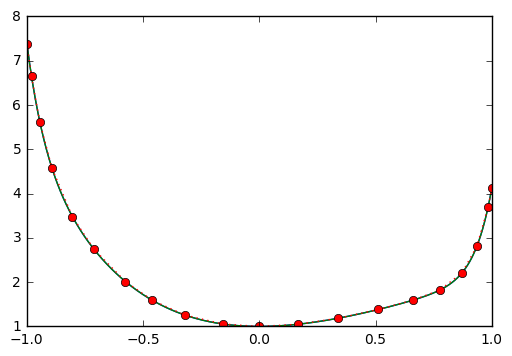

In [51]:
# work here :)
y_r_maxvol, x_maxvol, y_maxvol = cheb_maxvol(x, y, n, m)

plt.plot(x, y)    
plt.plot(x, y_r_maxvol)
plt.plot(x_maxvol, y_maxvol, linestyle = ':', marker = 'o')    